# Hardwork Pays Off
##### Predicting Exam Scores using Machine Learning
Since you are a student of Coding Blocks, you are expected to work hard and get better results than others. To track your time and expected performance in the Machine Learning Challenge, Prateek bhayia has asked to you install walkatime on your device which is an efficient time tracking tool to track your daily coding activity. It measures how much time you have spend on coding daily.
<html>
    <div style="width:100%">
        <div style="width:150px;height:150px;margin:auto">
            <img src="https://image.flaticon.com/icons/svg/1459/1459077.svg" >
        </div>
    </div>
</html>

Challenge
In this challenge, Prateek bhayia gives you walkatime data of his past students and how they performed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily.

Input You are given one feature corresponding to time noted by walkatime.
Output A scalar denoting the level of perfomance student achived by devoting the given time.
Download the training data and upload your predictions for the testcases given below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("Linear_X_Train.csv").values
Y=pd.read_csv("Linear_Y_Train.csv").values

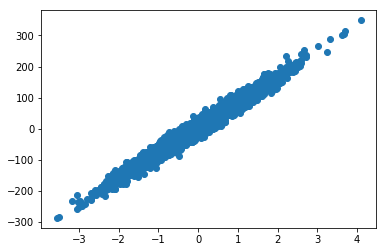

In [3]:
plt.scatter(X,Y)

In [4]:
mu=X.mean()
sigma=X.std()
X=(X-mu)/sigma

In [5]:
def hypothesis(theta,x):
    return theta[0]+theta[1]*x

def error(theta,X,Y):
    err=0
    m=X.shape[0]
    
    for i in range(m):
        err+=((hypothesis(theta,X[i])-Y[i])**2)
    return err/m

def gradient(theta,X,Y):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        hx=hypothesis(theta,X[i])
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad/m

def gradient_descent(X,Y,lr=0.1,max_itr=100):
    m=X.shape[0]
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    for i in range(max_itr):
        err=error(theta,X,Y)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        theta+=-lr*gradient(theta,X,Y)
        
    return theta,theta_list,error_list

theta,theta_list,error_list=gradient_descent(X,Y)


In [6]:
Y_pred=hypothesis(theta,X)

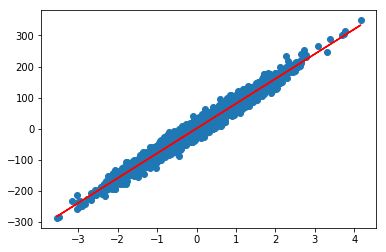

In [7]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

In [8]:
X_test=pd.read_csv("Linear_X_test.csv").values

In [9]:
X_test=(X_test-mu)/sigma

In [10]:
Y_pred=hypothesis(theta,X_test)

In [11]:
df = pd.DataFrame(data=Y_pred, columns=['y'])
df.to_csv("ans.csv", index=False)